In [2]:
import numpy as np
import pandas as pd

In [5]:
"""
None: Pythonic missing data
"""

arr1 = np.array([1, None, 3, 4])
print(arr1.dtype)


# None objects as missing values

object


In [8]:
"""
NaN: Missing Numerical Data
"""

arr3 = np.array([1, np.nan, 3, 4])
print(arr3)

[ 1. nan  3.  4.]


In [13]:
# Arithmetic with NaN will be another NaN

arr3.sum()

nan

In [15]:
# Special NumPy aggregation funcs that ignore these missing data

np.min(arr3)

nan

In [17]:
# Pandas automatically converts the None to a NaN value.

pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [20]:
"""
Detecting null values
"""

# isnull()

ser = pd.Series([1, np.nan, 'hello', None])
print(ser)

0        1
1      NaN
2    hello
3     None
dtype: object


In [22]:
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [24]:
# notnull()

ser.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [26]:
"""
Dropping Null Values
"""

# dropna()

ser.dropna()

0        1
2    hello
dtype: object

In [28]:
# For a DataFrame, there are more options

df = pd.DataFrame([[1,    np.nan, 2], [2,    3,    5], [np.nan, 4,    6]])

df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [30]:
# df.dropna(): list-wise deletion
df.dropna()

,0,1,2
1,2.0,3.0,5


In [32]:
# df.dropna(axis='columns'): variable deletion
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [34]:
# how/thresh parameters
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [38]:
# how= 'any' (default)
# how= 'all' which will only drop rows/columns that are all null values
df.dropna(how='all', axis='columns')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [41]:
# thresh = minimum number of non-null values to be kept
df.dropna(axis='rows', thresh=2)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [43]:
"""
Filling Null Values
"""

ser = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
ser

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [49]:
# Fill null values with a certain value
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [54]:
# Forward-fill = LOCF
ser.bfill()

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [58]:
# bfill with rows

df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [63]:
imp_df = df.fillna(method='ffill').copy()
imp_df = imp_df.fillna(method='bfill').copy()
imp_df

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [71]:
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './ds_1108_pr-data.csv'

df = pd.read_csv(input_file, index_col=[0], parse_dates=[0], date_parser=parser)

<ipython-input-71-97f712bcc342>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [75]:
# Print the summary of the dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


In [76]:
# Visualization setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
%config InlineBackend.figure_format = 'svg'

<AxesSubplot:xlabel='Datetime'>

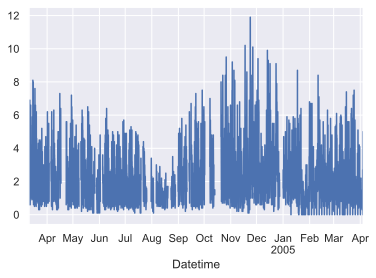

In [78]:
# Visualize the series of CO(GT)
df['CO(GT)'].plot()

In [87]:
# imputation

imp_locf = df['CO(GT)'].copy().ffill()
imp_nocb = df['CO(GT)'].copy().bfill()
imp_linear = df['CO(GT)'].copy().interpolate()
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())

In [88]:
# k-nn imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)

In [89]:
# add indices to the imputed result of k-nn
imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)

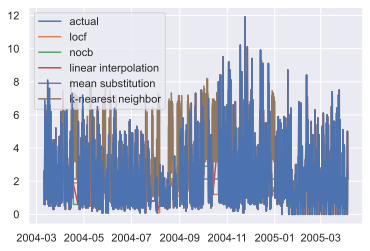

In [91]:
# Visualizing the imputed results

plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()

In [93]:
# Select the certain period to visualize

start = '2004-07-18'
end = '2004-10-20'

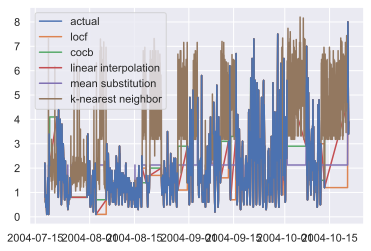

In [94]:
# Visualize 2004-07 ~ 2004-10

plt.plot(df['CO(GT)'].loc[start:end], label='actual', zorder=10)
plt.plot(imp_locf.loc[start:end], label='locf', zorder=1)
plt.plot(imp_nocb.loc[start:end], label='cocb', zorder=2)
plt.plot(imp_linear.loc[start:end], label='linear interpolation', zorder=3)
plt.plot(imp_mean.loc[start:end], label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'].loc[start:end], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()